In [ ]:
# Para correr este notebook hace falta instalar EmoPy: https://github.com/thoughtworksarts/EmoPy
# No es trivial para versiones de python recientes

In [ ]:

from EmoPy.src.fermodel import FERModel
from keras.models import load_model
import cv2
from scipy import misc
import numpy as np
import json
from pkg_resources import resource_filename

from IPython.display import Image

def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [4]:
class CustomFERModelo(FERModel):
    
    def _choose_model_from_target_emotions(self):
        """
        Initializes pre-trained deep learning model for the set of target emotions supplied by user.
        """
        model_indices = [self.emotion_index_map[emotion] for emotion in self.target_emotions]
        sorted_indices = [str(idx) for idx in sorted(model_indices)]
        model_suffix = ''.join(sorted_indices)
        #Modify the path to choose the model file and the emotion map that you want to use
        model_file = 'models/conv_model_%s.hdf5' % model_suffix
        emotion_map_file = 'models/conv_emotion_map_%s.json' % model_suffix
        emotion_map = json.loads(open(resource_filename('EmoPy', emotion_map_file)).read())
        return load_model(resource_filename('EmoPy', model_file), custom_objects={'cosine_proximity': cosine_similarity}), emotion_map

In [5]:
from keras.losses import cosine_similarity

In [7]:
#keras.losses.custom_loss = cosine_similarity

In [ ]:
from pkg_resources import resource_filename

In [ ]:
FERModel

In [8]:
target_emotions = ['calm', 'anger', 'happiness']
model = CustomFERModelo(target_emotions, verbose=True)


Initializing FER model parameters for target emotions: ['calm', 'anger', 'happiness']


In [11]:
model.predict?

In [14]:
model.model.predict?

In [10]:
model.predict(resource_filename('EmoPy.examples','image_data/sample_happy_image.png'))

InvalidArgumentError:  Default MaxPoolingOp only supports NHWC on device type CPU
	 [[node sequential/max_pooling2d_1/MaxPool (defined at /Users/gseva/virtualenvs/emotions/lib/python3.6/site-packages/EmoPy/src/fermodel.py:59) ]] [Op:__inference_predict_function_424]

Function call stack:
predict_function


In [1]:
import scipy.misc

In [2]:
scipy.misc.imread

<function numpy.lib.utils._Deprecate.__call__.<locals>.newfunc(*args, **kwds)>

In [17]:
gray_image = scipy.misc.imread(resource_filename('EmoPy.examples','image_data/sample_happy_image.png'))

/Users/gseva/virtualenvs/emotions/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


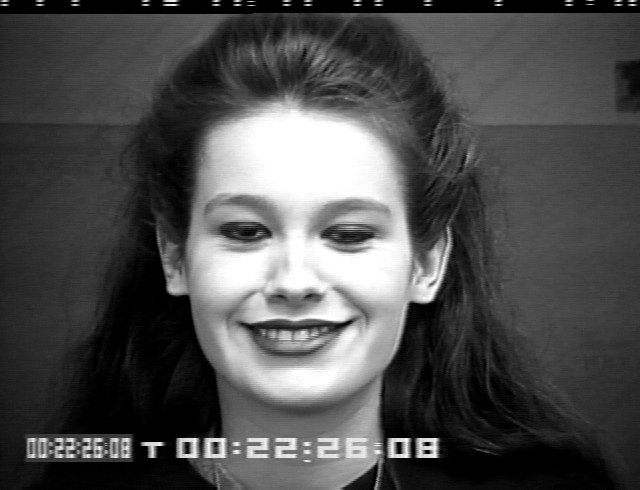

In [27]:
Image(resource_filename('EmoPy.examples','image_data/sample_happy_image.png'))

In [21]:
len(gray_image.shape) > 2

False

In [35]:
resized_image = cv2.resize(gray_image, model.target_dimensions, interpolation=cv2.INTER_LINEAR)

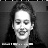

In [37]:
imshow(resized_image)

In [38]:
final_image = np.array([np.array([resized_image]).reshape(list(model.target_dimensions)+[model.channels])])

<function numpy.transpose(a, axes=None)>

In [44]:
prediction = model.model.predict(np.transpose(final_image))

InvalidArgumentError:  Default MaxPoolingOp only supports NHWC on device type CPU
	 [[node sequential/max_pooling2d_1/MaxPool (defined at /Users/gseva/virtualenvs/emotions/lib/python3.6/site-packages/EmoPy/src/fermodel.py:59) ]] [Op:__inference_predict_function_424]

Function call stack:
predict_function


In [40]:
final_image[0]

array([[[154],
        [  0],
        [  0],
        ...,
        [  0],
        [172],
        [209]],

       [[ 42],
        [ 45],
        [ 53],
        ...,
        [ 63],
        [ 61],
        [ 53]],

       [[ 38],
        [ 43],
        [ 45],
        ...,
        [ 62],
        [ 55],
        [ 49]],

       ...,

       [[ 16],
        [ 12],
        [ 17],
        ...,
        [ 17],
        [ 34],
        [ 29]],

       [[ 14],
        [ 16],
        [ 16],
        ...,
        [  2],
        [ 23],
        [ 23]],

       [[ 13],
        [ 18],
        [  7],
        ...,
        [  1],
        [ 14],
        [ 23]]], dtype=uint8)